In [1]:
import re
import pandas as pd
import numpy as np
from nltk import ngrams, FreqDist, ConditionalFreqDist, word_tokenize, pos_tag, download
import matplotlib.pyplot as plt
import seaborn as sns
from src.co_occurrence_network import plot_network
from src.jaccard import Jaccard

''' using JP analysis
import urllib
from janome.tokenizer import Tokenizer
'''

' using JP analysis\nimport urllib\nfrom janome.tokenizer import Tokenizer\n'

In [2]:
# Load data
df = pd.read_csv('./data/comment_data.csv')
comment_df = df[df['emoticon_id'] == 'No_id']
comment_df = comment_df['comment']

In [ ]:
# JP
# stop word data
url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
urllib.request.urlretrieve(url, './data/stop_word.txt')

with open('./data/stop_word.txt', 'r', encoding='utf_8') as f:
    stop_word = [i.rstrip('\n') for i in f]

# morphological analysis
t = Tokenizer(mmap=True)
re_hiragana = re.compile(r'^[あ-ん]+$')
sentence_jp = []
tokens_jp = []

for line in jp['word']:
    tmp = []
    malist = t.tokenize(line)
    
    for word in malist:
        base, part = word.surface, word.part_of_speech
        
        # extract Meishi ^ not stop word
        if '名詞' in part and base not in stop_word:
            hiragana = re_hiragana.fullmatch(base) 
            
            # Hiragana (one character) or 'ー'
            if hiragana!=None and len(hiragana[0])==1 or base=='ー':
                continue
            
            tokens_jp.append(base)
            tmp.append(base)
    sentence_jp.append(tmp)
    
del tmp

In [3]:
download('punkt')
download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/ambai-
[nltk_data]     kotaro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ambai-kotaro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# EN
tokens_en = []
sentence_en = []
re_eng = re.compile(r'^[a-z]+$')

for line in comment_df:
    tmp = []
    malist = word_tokenize(line)
    malist = pos_tag(malist)
    
    for word in malist:
        if 'NN' in word:
            re_check = re_eng.fullmatch(word[0])
            
            if re_check!=None and len(re_check[0])==1:
                continue
            
            tokens_en.append(word[0])
            tmp.append(word[0])
            
    sentence_en.append(tmp)

del tmp

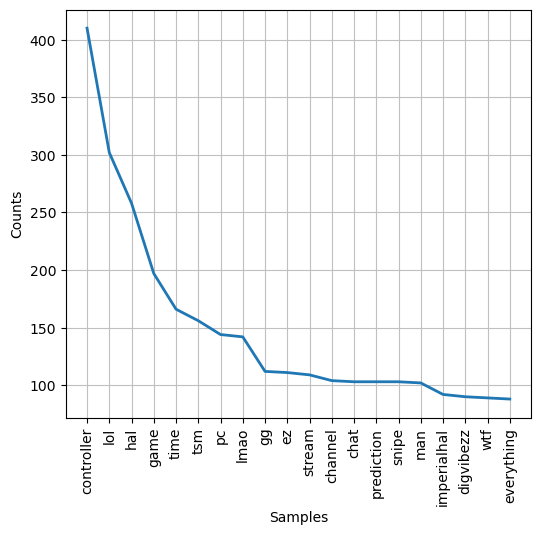

In [5]:
# plot word frequency
tokens_l = [word.lower() for word in tokens_en]
fd = FreqDist(tokens_l)
fig = plt.figure(figsize=(6, 6), dpi=100)
plt.gcf().subplots_adjust(bottom=0.2)
fd.plot(20)
plt.show()
fig.savefig('./result/freq_en.png')

In [6]:
tokens = tokens_en
sentence = sentence_en
ja = Jaccard(sentence, tokens)
df = ja.jaccard_index()
df.head()

,word1,word2,intersection_count,count1,count2,union_count,jaccard_coefficient
0,hey,dad,1,28.0,25.0,52.0,0.019231
1,hey,weirdo,1,28.0,2.0,29.0,0.034483
2,hey,hal,3,28.0,258.0,283.0,0.010601
3,hey,chat,1,28.0,103.0,130.0,0.007692
4,hey,love,1,28.0,10.0,37.0,0.027027


In [7]:
n_word_lower = 40
edge_threshold = 0.01
random_state = 42

df_plot = df.sort_values('jaccard_coefficient', ascending=False)
df_plot = df_plot[(df_plot['count1'] >= n_word_lower) & (df_plot['count2'] >= n_word_lower)]

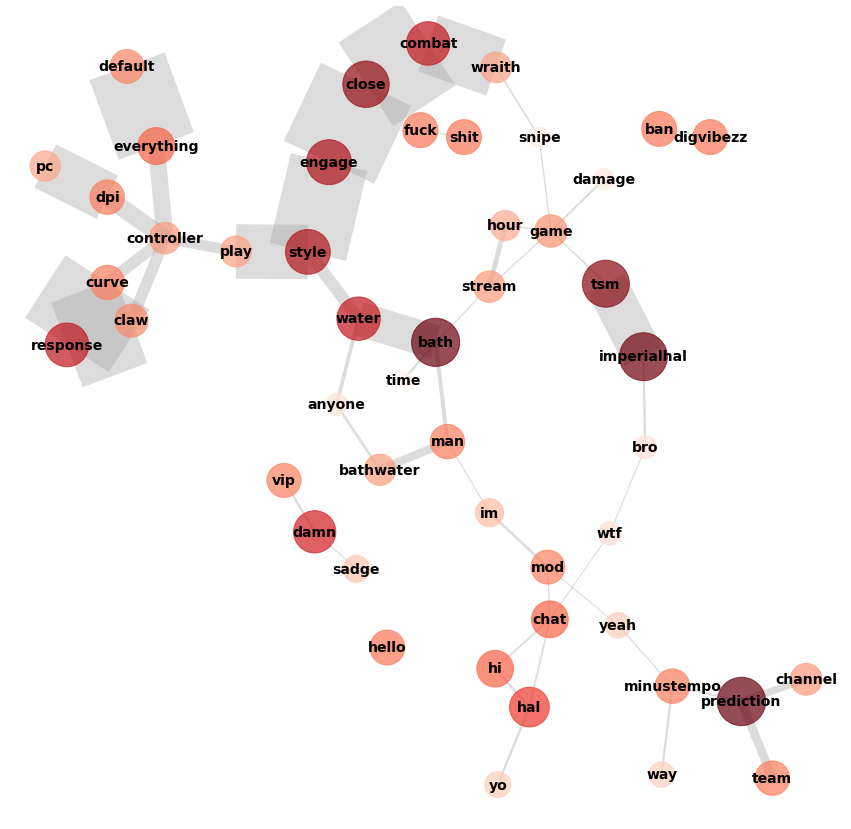

In [8]:
plot_network(df_plot, edge_threshold, random_state)